<a href="https://colab.research.google.com/github/kashish1720/mldl_lab_sem6/blob/main/exp%207/mldl_7exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4555 - loss: 0.7655 - val_accuracy: 0.4715 - val_loss: 0.7192
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5247 - loss: 0.7285 - val_accuracy: 0.5854 - val_loss: 0.6871
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5964 - loss: 0.6745 - val_accuracy: 0.6260 - val_loss: 0.6643
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6403 - loss: 0.6439 - val_accuracy: 0.6341 - val_loss: 0.6418
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6862 - loss: 0.5986 - val_accuracy: 0.6260 - val_loss: 0.6234
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6672 - loss: 0.5986 - val_accuracy: 0.6341 - val_loss: 0.6060
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6873 - loss: 0.5965 - val_accuracy: 0.6260 - val_loss: 0.5881
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6916 - loss: 0.5714 - val_accuracy: 0.

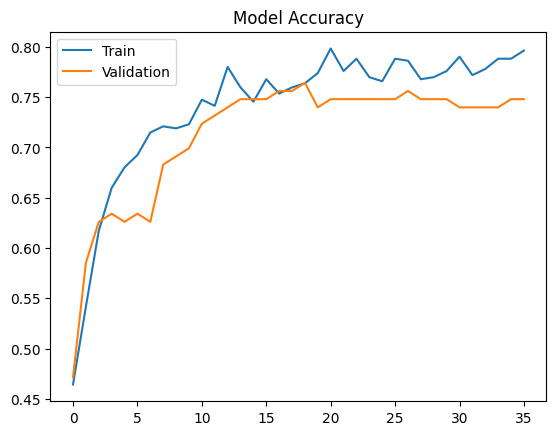

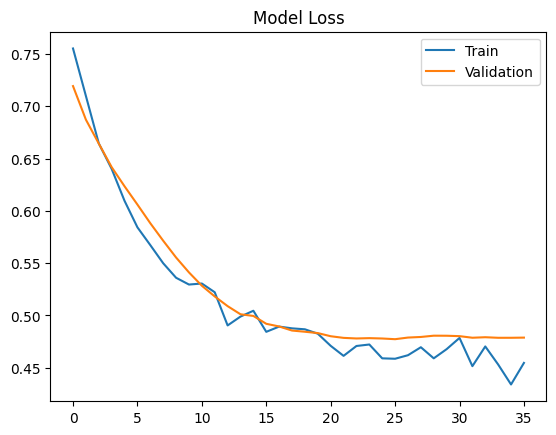

In [4]:
# ============================
# IMPROVED ANN MODEL
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load Dataset (Directly)
data = pd.read_csv("/content/diabetes.csv")

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Improved Model with Dropout (to reduce overfitting)
model = keras.Sequential([
    keras.Input(shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test)
print("\nImproved Test Accuracy:", accuracy)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['Train','Validation'])
plt.show()

# Plot Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['Train','Validation'])
plt.show()